In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv("titanic_dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop("Cabin",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

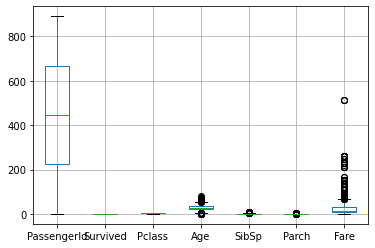

In [15]:
df.boxplot()

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [17]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(577, 11)


<ipython-input-17-2608cccbd6cd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-17-2608cccbd6cd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

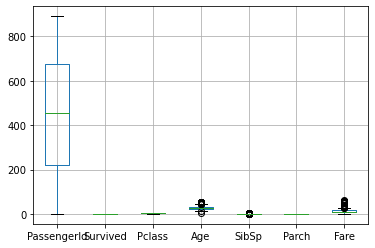

In [18]:
df_out.boxplot()

In [19]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Embarked     577 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 54.1+ KB


In [20]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df_out["Embarked"].value_counts()

S    433
C     80
Q     64
Name: Embarked, dtype: int64

In [22]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
df_out["Pclass"].value_counts()

3    373
2    121
1     83
Name: Pclass, dtype: int64

In [22]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
df_out["Survived"].value_counts()

0    404
1    173
Name: Survived, dtype: int64

In [25]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
df_out["Sex"].value_counts()

male      434
female    143
Name: Sex, dtype: int64

In [27]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
df_out["SibSp"].value_counts()

0    473
1     93
2     11
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

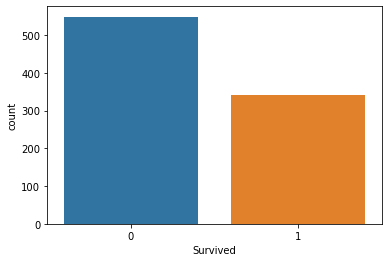

In [29]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

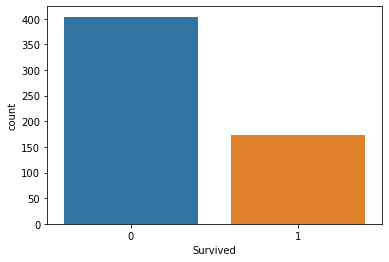

In [35]:
sns.countplot(x="Survived",data=df_out)

<AxesSubplot:xlabel='Sex', ylabel='count'>

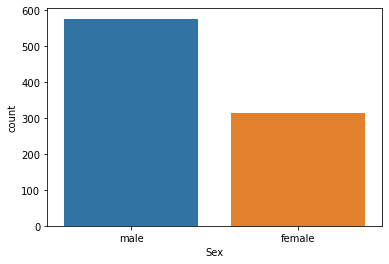

In [30]:
sns.countplot(x="Sex",data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

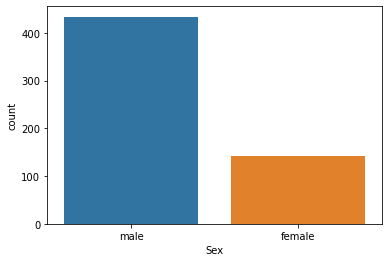

In [37]:
sns.countplot(x="Sex",data=df_out)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

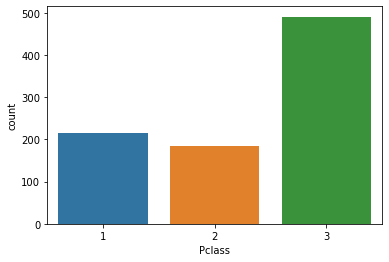

In [31]:
sns.countplot(x="Pclass",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

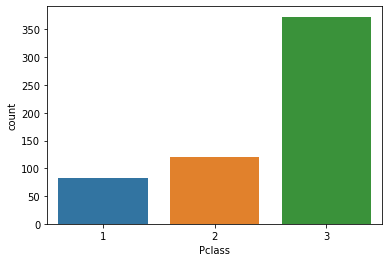

In [38]:
sns.countplot(x="Pclass",data=df_out)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

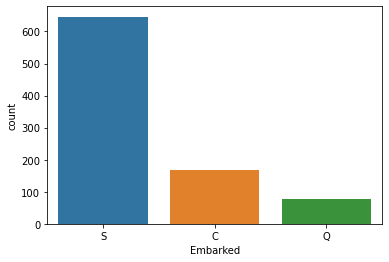

In [33]:
sns.countplot(x="Embarked",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

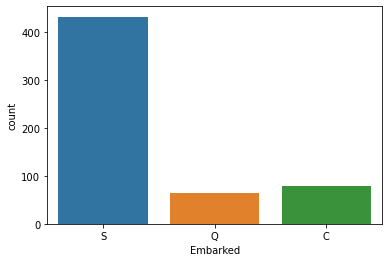

In [39]:
sns.countplot(x="Embarked",data=df_out)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

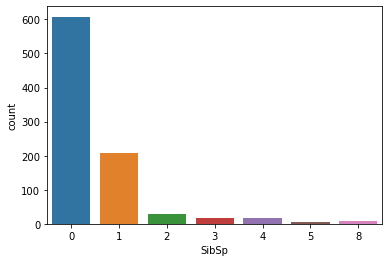

In [34]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

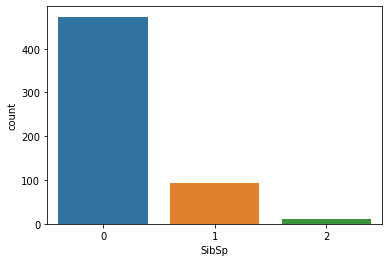

In [41]:
sns.countplot(x="SibSp",data=df_out)

In [42]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Embarked     577 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 70.3+ KB


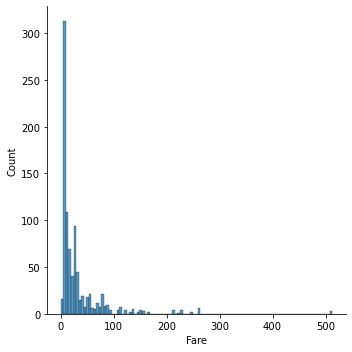

In [44]:
sns.displot(df["Fare"])

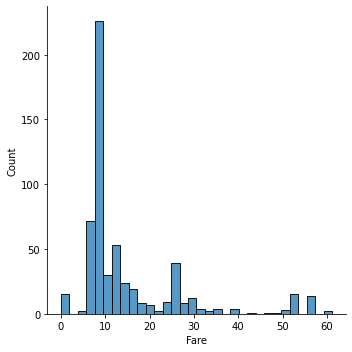

In [45]:
sns.displot(df_out["Fare"])

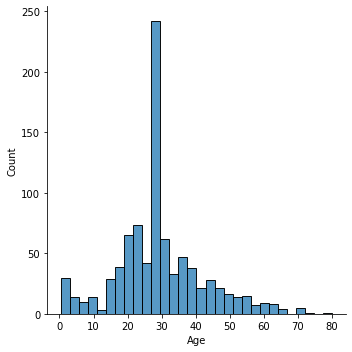

In [47]:
sns.displot(df["Age"])

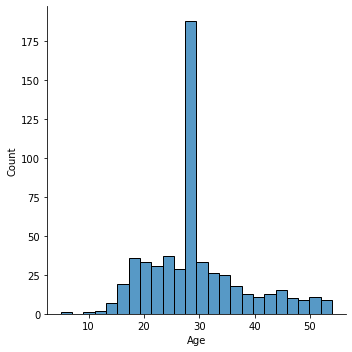

In [48]:
sns.displot(df_out["Age"])

In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [1]:
sns.displot(df["Ticket"])

NameError: name 'sns' is not defined